# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-beta.fix.120.155'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
165337,2020-07-27,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165338,2020-07-28,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165339,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165340,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165341,2020-07-31,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
165337,2020-07-27,Colombia,Vichada,2,1,0,1
165338,2020-07-28,Colombia,Vichada,2,1,0,1
165339,2020-07-29,Colombia,Vichada,2,1,0,1
165340,2020-07-30,Colombia,Vichada,2,1,0,1
165341,2020-07-31,Colombia,Vichada,2,1,0,1


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
194,2020-07-27,11345,2893,328,8124
195,2020-07-28,11611,2819,328,8464
196,2020-07-29,11861,2774,329,8758
197,2020-07-30,12228,2789,330,9109
198,2020-07-31,12691,2921,332,9438


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-27,16433055,3852095,653639,11927321,0.019888,0.362906,0.051955
2020-07-28,16686493,6381090,659907,9645496,0.019774,0.289021,0.064035
2020-07-29,16975551,6462034,666332,9847185,0.019626,0.290040,0.063379
2020-07-30,17314967,6572729,673835,10068403,0.019458,0.290743,0.062728
2020-07-31,17295308,6551503,674122,10069683,0.019489,0.291110,0.062745


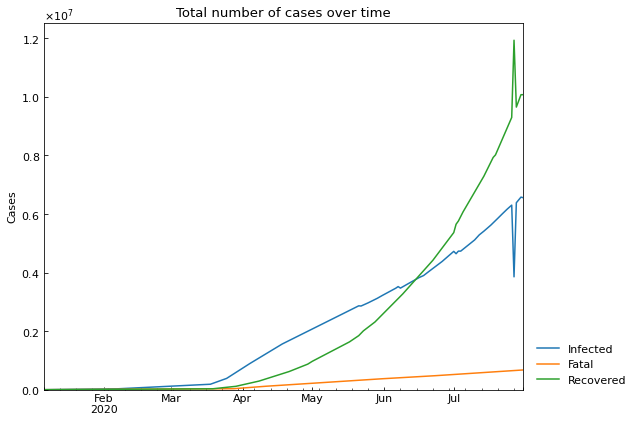

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
203,2020-07-27,31203,8094,998,22111
204,2020-07-28,32184,8377,1001,22806
205,2020-07-29,33448,8942,1005,23501
206,2020-07-30,34749,9569,1006,24174
207,2020-07-31,36330,10395,1012,24923


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
167,2020-07-27,29969,6857,996,22116
168,2020-07-28,30961,7152,998,22811
169,2020-07-29,31901,7393,1001,23507
170,2020-07-30,33049,7866,1004,24179
171,2020-07-31,34372,8437,1006,24929


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
165337,2020-07-27,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165338,2020-07-28,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165339,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165340,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165341,2020-07-31,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
163546,COL,Colombia,Vichada,2020-07-27,107808
163547,COL,Colombia,Vichada,2020-07-28,107808
163548,COL,Colombia,Vichada,2020-07-29,107808
163549,COL,Colombia,Vichada,2020-07-30,107808
163550,COL,Colombia,Vichada,2020-07-31,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
165337,2020-07-27,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165338,2020-07-28,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165339,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165340,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
165341,2020-07-31,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
165337,2020-07-27,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
165338,2020-07-28,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
165339,2020-07-29,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
165340,2020-07-30,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
165341,2020-07-31,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
203,2020-07-27,1,1,1,0,0,1,1,3,2,2,1,32.41
204,2020-07-28,1,1,1,0,0,1,1,3,2,2,1,32.41
205,2020-07-29,1,1,1,0,0,1,1,3,2,2,1,32.41
206,2020-07-30,1,1,1,0,0,1,1,3,2,2,1,32.41
207,2020-07-31,1,1,1,0,0,1,1,3,2,2,1,32.41


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
203,2020-07-27,1,1,1,0,0,1,1,3,2,2,1,32.41
204,2020-07-28,1,1,1,0,0,1,1,3,2,2,1,32.41
205,2020-07-29,1,1,1,0,0,1,1,3,2,2,1,32.41
206,2020-07-30,1,1,1,0,0,1,1,3,2,2,1,32.41
207,2020-07-31,1,1,1,0,0,1,1,3,2,2,1,32.41


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

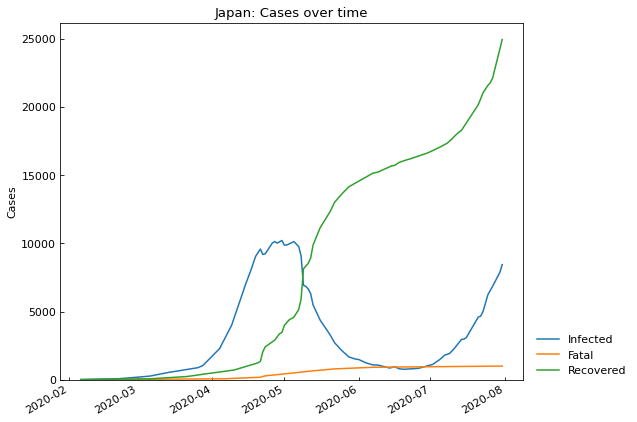

,Date,Confirmed,Infected,Fatal,Recovered
167,2020-07-27,29969,6857,996,22116
168,2020-07-28,30961,7152,998,22811
169,2020-07-29,31901,7393,1001,23507
170,2020-07-30,33049,7866,1004,24179
171,2020-07-31,34372,8437,1006,24929


In [26]:
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

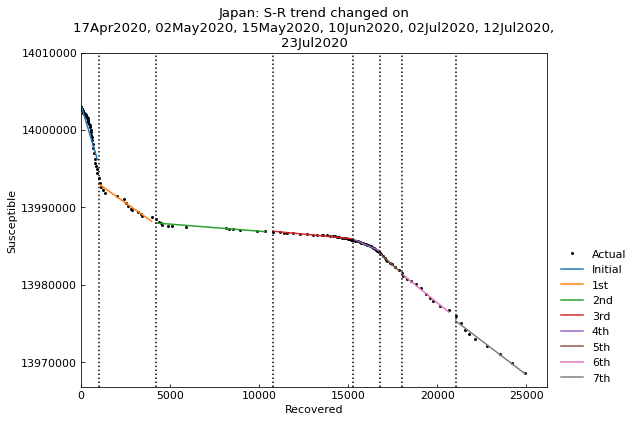

,Type,Start,End,Population
1st,Past,17Apr2020,01May2020,14002973
2nd,Past,02May2020,14May2020,14002973
3rd,Past,15May2020,09Jun2020,14002973
4th,Past,10Jun2020,01Jul2020,14002973
5th,Past,02Jul2020,11Jul2020,14002973
6th,Past,12Jul2020,22Jul2020,14002973
7th,Past,23Jul2020,31Jul2020,14002973


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	7th phase with SIR-F model finished 400 trials in 0 min 15 sec.

	1st phase with SIR-F model finished 153 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 139 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 292 trials in 0 min 10 sec.

	4th phase with SIR-F model finished 152 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 156 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 192 trials in 0 min 5 sec.

Completed optimization. Total: 1 min 45 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,17Apr2020,01May2020,14002973,SIR-F,0.010962,0.004857,0.047160,0.000079,360,2.12,0.047,3148,22,51,0.137505,153,0 min 5 sec
2nd,Past,02May2020,14May2020,14002973,SIR-F,0.003995,0.014413,0.025311,0.000149,360,0.27,0.025,1680,62,17,0.180579,139,0 min 5 sec
3rd,Past,15May2020,09Jun2020,14002973,SIR-F,0.004595,0.019806,0.247921,0.000041,360,0.17,0.248,6162,54,12,0.121153,292,0 min 10 sec
4th,Past,10Jun2020,01Jul2020,14002973,SIR-F,0.017502,0.017795,0.115711,0.000150,360,0.86,0.116,1667,14,14,0.143076,152,0 min 5 sec
5th,Past,02Jul2020,11Jul2020,14002973,SIR-F,0.038462,0.016679,0.050413,0.000555,360,2.12,0.050,450,6,14,0.059369,156,0 min 5 sec
6th,Past,12Jul2020,22Jul2020,14002973,SIR-F,0.032772,0.018251,0.001114,0.000071,360,1.79,0.001,3514,7,13,0.039045,192,0 min 5 sec
7th,Past,23Jul2020,31Jul2020,14002973,SIR-F,0.032932,0.015577,0.000153,0.000146,360,2.09,0.000,1708,7,16,0.031096,400,0 min 15 sec


### Accuracy of estimation

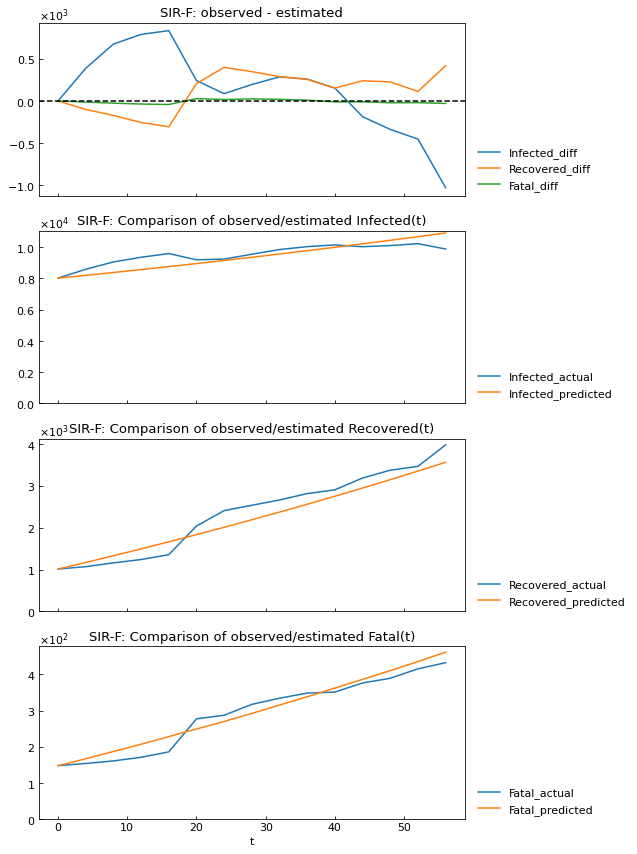

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

0.86

### Show parameter history

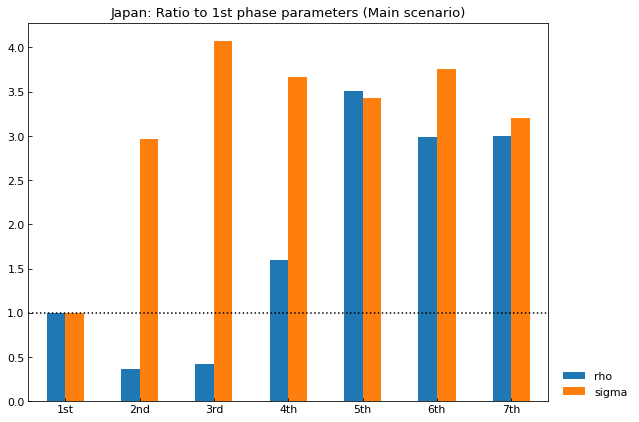

,1st,2nd,3rd,4th,5th,6th,7th
rho,1.0,0.364454,0.419192,1.596626,3.508612,2.989549,3.004229
sigma,1.0,2.967208,4.077635,3.663510,3.433837,3.757370,3.206874


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

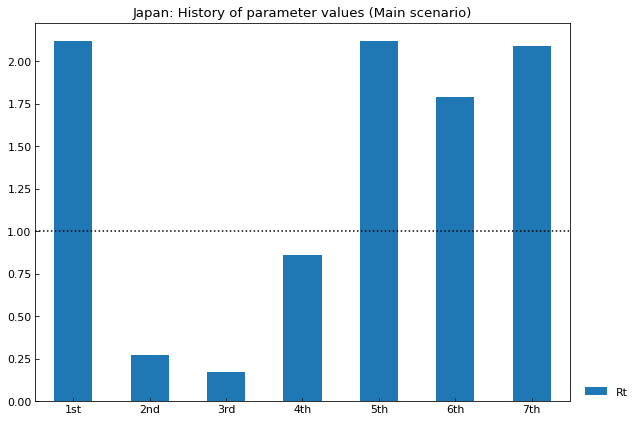

,1st,2nd,3rd,4th,5th,6th,7th
Rt,2.12,0.27,0.17,0.86,2.12,1.79,2.09


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

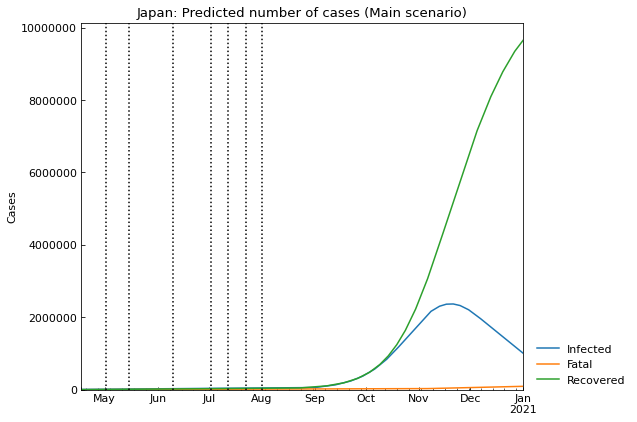

,Date,Fatal,Infected,Recovered,Susceptible
255,28Dec2020,91161,1126050,9413802,3371959
256,29Dec2020,91816,1091305,9482878,3336974
257,30Dec2020,92449,1057291,9549811,3303421
258,31Dec2020,93063,1024021,9614648,3271241
259,01Jan2021,93438,1003580,9654206,3251750


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.015576883603445595

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.03115376720689119

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     0th      Past  17Apr2020  01May2020    14002973  SIR-F  0.010962   
         1st      Past  02May2020  14May2020    14002973  SIR-F  0.003995   
         2nd      Past  15May2020  09Jun2020    14002973  SIR-F  0.004595   
         3rd      Past  10Jun2020  01Jul2020    14002973  SIR-F  0.017502   
         4th      Past  02Jul2020  11Jul2020    14002973  SIR-F  0.038462   
         5th      Past  12Jul2020  22Jul2020    14002973  SIR-F  0.032772   
         6th      Past  23Jul2020  31Jul2020    14002973  SIR-F  0.032932   
         7th    Future  01Aug2020  01Jan2021    14002973  SIR-F  0.032932   
Medicine 0th      Past  17Apr2020  01May2020    14002973  SIR-F  0.010962   
         1st      Past  02May2020  14May2020    14002973  SIR-F  0.003995   
         2nd      Past  15May2020  09Jun2020    14002973  SIR-F  0.004595   
         3rd      Past  10Jun2020  01Jul2020    14002973  SIR-F  0.017502   
         4th      Past  02Jul2020  11Jul2020    14002973  SIR-F  0.038462   
         5th      Past  12Jul2020  22Jul2020    14002973  SIR-F  0.032772   
         6th      Past  23Jul2020  31Jul2020    14002973  SIR-F  0.032932   
         7th    Future  01Aug2020  31Aug2020    14002973  SIR-F  0.032932   
         8th    Future  01Sep2020  01Jan2021    14002973  SIR-F  0.032932   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     0th    0.004857  0.047160  0.000079  360  2.12       0.047   
         1st    0.014413  0.025311  0.000149  360  0.27       0.025   
         2nd    0.019806  0.247921  0.000041  360  0.17       0.248   
         3rd    0.017795  0.115711  0.000150  360  0.86       0.116   
         4th    0.016679  0.050413  0.000555  360  2.12       0.050   
         5th    0.018251  0.001114  0.000071  360  1.79       0.001   
         6th    0.015577  0.000153  0.000146  360  2.09       0.000   
         7th    0.015577  0.000153  0.000146  360  2.09       0.000   
Medicine 0th    0.004857  0.047160  0.000079  360  2.12       0.047   
         1st    0.014413  0.025311  0.000149  360  0.27       0.025   
         2nd    0.019806  0.247921  0.000041  360  0.17       0.248   
         3rd    0.017795  0.115711  0.000150  360  0.86       0.116   
         4th    0.016679  0.050413  0.000555  360  2.12       0.050   
         5th    0.018251  0.001114  0.000071  360  1.79       0.001   
         6th    0.015577  0.000153  0.000146  360  2.09       0.000   
         7th    0.015577  0.000153  0.000146  360  2.09       0.000   
         8th    0.031154  0.000153  0.000146  360  1.05       0.000   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     0th              3148            22             51   0.137505    153   
         1st              1680            62             17   0.180579    139   
         2nd              6162            54             12   0.121153    292   
         3rd              1667            14             14   0.143076    152   
         4th               450             6             14  0.0593688    156   
         5th              3514             7             13  0.0390454    192   
         6th              1708             7             16  0.0310959    400   
         7th              1708             7             16          -      -   
Medicine 0th              3148            22             51   0.137505    153   
         1st              1680            62             17   0.180579    139   
         2nd              6162            54             12   0.121153    292   
         3rd              1667            14             14   0.143076    152   
         4th               450             6             14  0.0593688

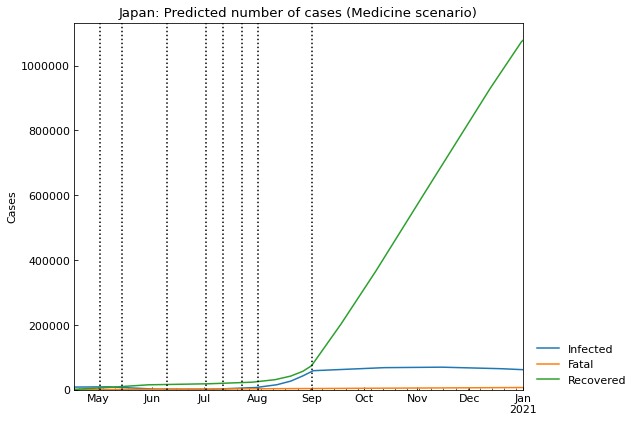

,Date,Fatal,Infected,Recovered,Susceptible
255,28Dec2020,6561,62682,1050459,12883271
256,29Dec2020,6599,62428,1058255,12875692
257,30Dec2020,6636,62170,1066018,12868148
258,31Dec2020,6674,61910,1073750,12860639
259,01Jan2021,6697,61746,1078567,12855964


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 01Jan2021,Fatal on 01Jan2021
Main,2370509,19Nov2020,1003580,93438
Medicine,69699,06Nov2020,61746,6697
